In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(292,312)]
i =0
result = np.zeros((240))

In [3]:
for yy in years:
    for mm in months:

        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/TEMP150/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        plotvar = plotvar[0,247:365,1100:1200]
        #plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=0)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

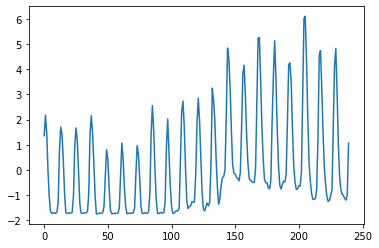

In [4]:
plt.plot(result)

In [4]:
salt = np.zeros((240))
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/SALT/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        plotvar = plotvar[0,247:365,1100:1200]
        #plotvar = plotvar[0,224:343,1100:1200]
        #plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=0)
        salt[i] = aveplot
        
        i = i + 1
#********************************************************************

In [5]:
TTT = result[8:236].reshape(19,12)
SSS = salt[8:236].reshape(19,12)

In [6]:
(34.7-33.3)/0.01

140.00000000000057

In [7]:
T = np.arange(-2,6.5,0.01)
S = np.arange(33.3,34.7,0.01)
dens = np.zeros([850,141])

In [8]:
import seawater as gsw
# Loop to fill in grid with densities
for j in range(0,850):
    for i in range(0, 141):
        dens[j,i]=gsw.dens0(S[i],T[j])-1000

In [9]:
SSSmean = (SSS[0,:] + SSS[1,:] + SSS[2,:] + SSS[3,:] + SSS[4,:] + SSS[5,:] + SSS[6,:] + SSS[7,:])/8
TTTmean = (TTT[0,:] + TTT[1,:] + TTT[2,:] + TTT[3,:] + TTT[4,:] + TTT[5,:] + TTT[6,:] + TTT[7,:])/8

In [10]:
SSSmean1 = (SSS[10,:] + SSS[11,:] + SSS[12,:] + SSS[13,:]+ SSS[14,:] + SSS[15,:] + SSS[16,:] + SSS[17,:] +\
            SSS[18,:])/9
TTTmean1 = (TTT[10,:] + TTT[11,:] + TTT[12,:] + TTT[13,:]+ TTT[14,:] + TTT[15,:] + TTT[16,:] + TTT[17,:] +\
            TTT[18,:])/9

In [11]:
np.nanmax(SSSmean)

34.44205188751221

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


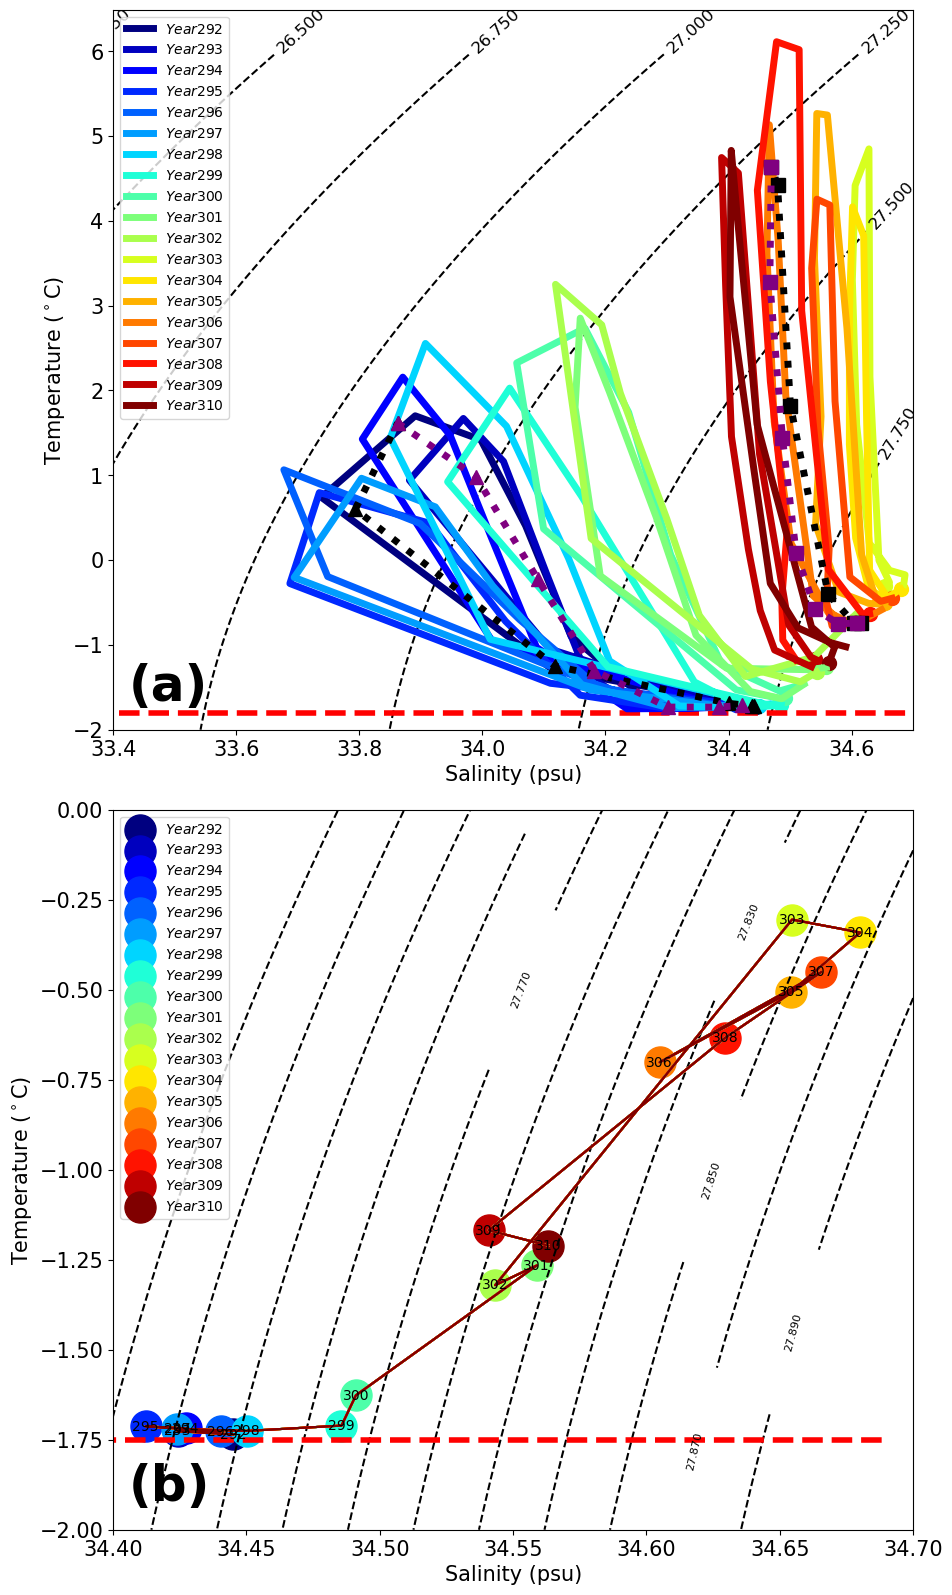

In [12]:
my_font = {'fontname':'Cambria', 'size':'15'}
# Plot data ***********************************************
fig = plt.figure(figsize=(10, 20), dpi=100)
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.36])
CS = plt.contour(S,T,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1,fmt='%1.3f') # Label every second level
plt.hlines(-1.8,33.41, 34.69, colors = "red",linestyles = "dashed",linewidth=4)
Time = np.arange(0,14,1)

number = 19
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i, color in enumerate(colors, start=0):
    ax1.plot(SSS[i,:],TTT[i,:], color=color,linewidth=5, label='$Year {i} $'.format(i=i+292))
    ax1.legend(loc='upper left')

for i, color in enumerate(colors, start=0):
    ax1.scatter(SSS[i,0],TTT[i,0], color=color,s=100 )

ax1.plot(SSSmean[:6],TTTmean[:6],color='black', marker='^', linestyle='dotted',linewidth=5,markersize=10)
ax1.plot(SSSmean[5:],TTTmean[5:],color='purple', marker='^', linestyle='dotted',linewidth=5,markersize=10)

ax1.plot(SSSmean1[:6],TTTmean1[:6],color='black', marker='s', linestyle='dotted',linewidth=5,markersize=10)
ax1.plot(SSSmean1[5:],TTTmean1[5:],color='purple', marker='s', linestyle='dotted',linewidth=5,markersize=10)

plt.xlim(33.4, 34.7)
plt.yticks(**my_font)
plt.xticks(**my_font)
ax1.set_xlabel('Salinity (psu)', **my_font)
ax1.set_ylabel('Temperature ($^\circ$C)', **my_font)
#ax1.set_title('T-S Diagrams (From model year 292-310, averaged in MRP region)',**my_font)
ax1.text(0.02, 0.04, '(a)', transform=ax1.transAxes,size=36, weight='bold')
#############################################################################
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.36])
CS = plt.contour(S,T,dens, levels=[27.69,27.71,27.73,27.75, 27.77,27.79,27.81,27.83,27.85,27.87,27.89],linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=8,inline_spacing=0.1,fmt='%1.3f') # Label every second level

plt.hlines(-1.75,33.51, 34.69, colors = "red",linestyles = "dashed",linewidth=4)
Time = np.arange(0,14,1)

number = 19
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]


for i, color in enumerate(colors, start=0):
    t = plt.text(SSS[i,0],TTT[i,0], i+292, fontsize=10,horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'black'})

    ax2.plot(SSS[:,0],TTT[:,0],color=color)
    #ax1.scatter(SSS[:,0],TTT[:,0])
    ax2.scatter(SSS[i,0],TTT[i,0], color=color,s=500,label='$Year {i} $'.format(i=i+292) )
    ax2.legend()

plt.xlim(34.4, 34.7)

plt.ylim(-2, 0)
plt.yticks(**my_font)
plt.xticks(**my_font)
ax2.set_xlabel('Salinity (psu)', **my_font)
ax2.set_ylabel('Temperature ($^\circ$C)', **my_font)
#ax1.set_title('T-S Diagrams (From model year 292-310, averaged in MRP region)',**my_font)
ax2.text(0.02, 0.04, '(b)', transform=ax2.transAxes,size=36, weight='bold')

plt.savefig("T-S292-310",bbox_inches='tight',dpi=fig.dpi)

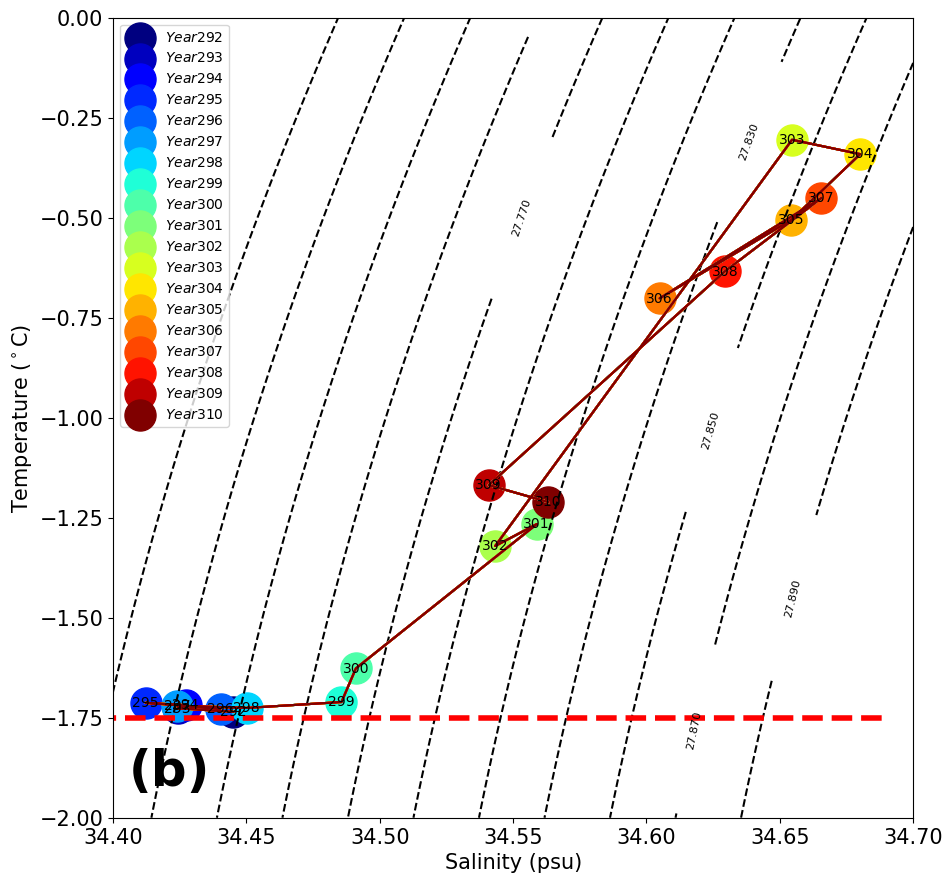

In [13]:
my_font = {'fontname':'Cambria', 'size':'15'}
# Plot data ***********************************************
fig = plt.figure(figsize=(10, 10), dpi=100)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
CS = plt.contour(S,T,dens, levels=[27.69,27.71,27.73,27.75, 27.77,27.79,27.81,27.83,27.85,27.87,27.89],linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=8,inline_spacing=0.1,fmt='%1.3f') # Label every second level

plt.hlines(-1.75,33.51, 34.69, colors = "red",linestyles = "dashed",linewidth=4)
Time = np.arange(0,14,1)

number = 19
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]


for i, color in enumerate(colors, start=0):
    t = plt.text(SSS[i,0],TTT[i,0], i+292, fontsize=10,horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'black'})

    ax1.plot(SSS[:,0],TTT[:,0],color=color)
    #ax1.scatter(SSS[:,0],TTT[:,0])
    ax1.scatter(SSS[i,0],TTT[i,0], color=color,s=500,label='$Year {i} $'.format(i=i+292) )
    ax1.legend()

plt.xlim(34.4, 34.7)

plt.ylim(-2, 0)
plt.yticks(**my_font)
plt.xticks(**my_font)
ax1.set_xlabel('Salinity (psu)', **my_font)
ax1.set_ylabel('Temperature ($^\circ$C)', **my_font)
#ax1.set_title('T-S Diagrams (From model year 292-310, averaged in MRP region)',**my_font)
ax1.text(0.02, 0.04, '(b)', transform=ax1.transAxes,size=36, weight='bold')
plt.savefig("T-S292-310new",bbox_inches='tight',dpi=fig.dpi)

In [14]:
 SSS[3,0]

34.412174224853516

In [15]:
SSS[2,0]

34.42716598510742

In [16]:
TTT[2,0]

-1.7186367511749268

In [17]:
TTT[3,0]

-1.7127577066421509

In [18]:
x = round(5.76543, 5)
print(x)

5.76543


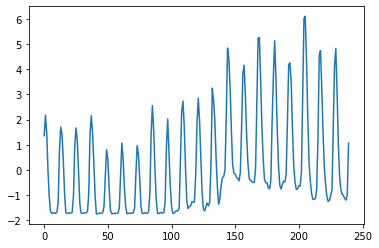

In [5]:
plt.plot(result)

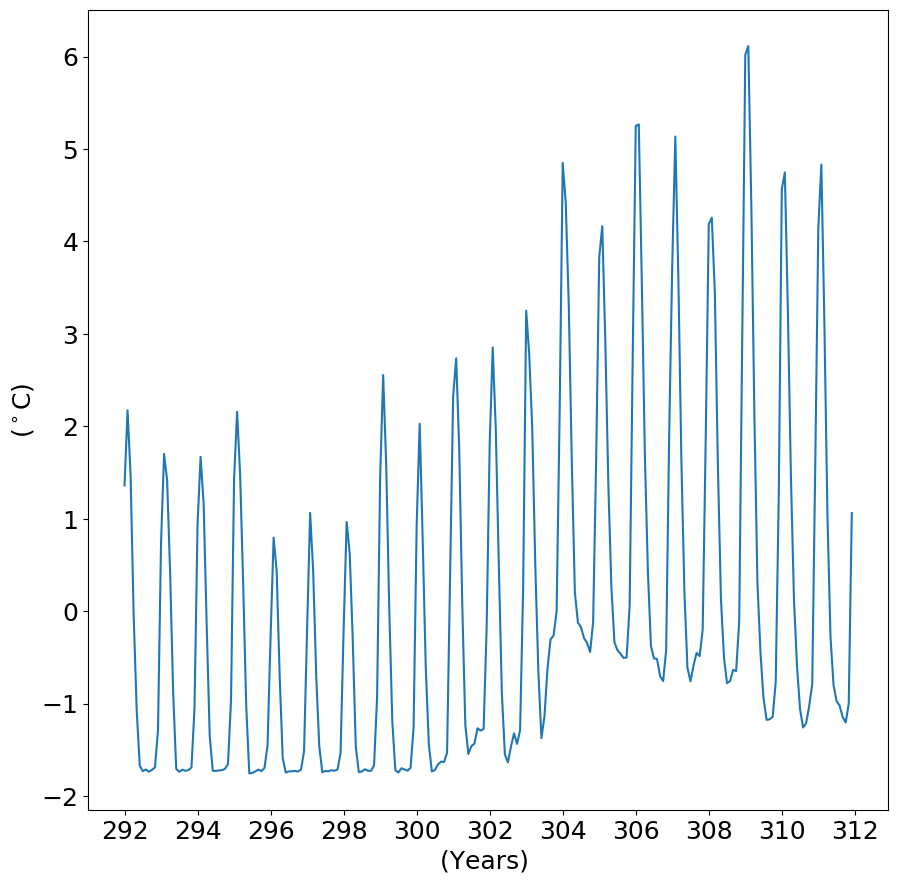

In [16]:
my_font = {'fontname':'Cambria', 'size':'18'}
# Plot data ***********************************************
fig = plt.figure(figsize=(10, 10), dpi=100)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
CS = plt.plot(result)

plt.xticks(range(0,241,24), ['292','294','296', '298','300','302', '304','306','308','310','312','314'],**my_font)
plt.xlabel("(Years) ",**my_font)
plt.ylabel('($^\circ$C)', **my_font)
plt.yticks(**my_font)

plt.savefig("Sea001ee.png",bbox_inches='tight')